In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
cdata=pd.read_csv('C:/Users/user/workspace/data/data_science-hw2/cdata.csv')
cdata.head(5)

,x,y,cluster
0,2.1364,0.8369,1
1,7.4096,-1.4137,3
2,5.0996,1.1552,0
3,7.8149,-1.0186,3
4,1.8925,1.2714,1


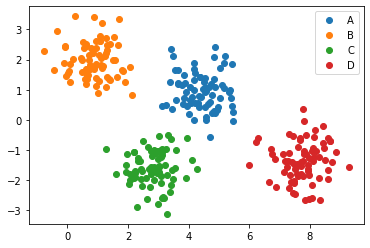

In [3]:
cluster_ans=cdata.groupby('cluster')
for name, group in cluster_ans:
    plt.plot(group["x"], group["y"], marker="o", linestyle="", label=name)
plt.legend(['A', 'B', 'C', 'D'])
plt.show()

In [4]:
def distance(x, y, x_initial, y_initial):
    distance=np.zeros((len(x), len(x_initial)))
    for i in range(len(x)):
        distance[i]=(((x[i]-x_initial)**2)+((y[i]-y_initial)**2))
    return np.sqrt(distance)

def kmeans(x, y, k, iteration, random_seed=10):
    
    np.random.seed(random_seed)
    
    x_initial=[]
    y_initial=[]
    dist=np.zeros((iteration, len(x), k))
    cluster=np.zeros((iteration, len(x)))
    sse=np.zeros((iteration, ))

    x_initial.append(np.random.uniform(x.min(), x.max(), k))
    y_initial.append(np.random.uniform(y.min(), y.max(), k))

    for i in range(iteration):

        dist[i]=distance(x, y, x_initial[i], y_initial[i])
        cluster[i]=np.argmin(dist[i], axis=1)

        x_center=np.zeros((iteration, k))
        y_center=np.zeros((iteration, k))
        for j in range(k):
            x_center[i][j]=x.groupby(cluster[i]).get_group(j).mean()
            y_center[i][j]=y.groupby(cluster[i]).get_group(j).mean()

        x_initial.append(x_center[i])
        y_initial.append(y_center[i])

        sse[i]=np.min(dist[i]**2, axis=1).sum()

    lists=[x_initial[0:-1], y_initial[0:-1], cluster, sse]
    names=['x_initial','y_initial', 'cluster', 'sse']
    dic_return=dict(zip(names, lists))
    
    return dic_return

In [5]:
result=kmeans(x=cdata.x, y=cdata.y, k=4, iteration=3)
#print(result)

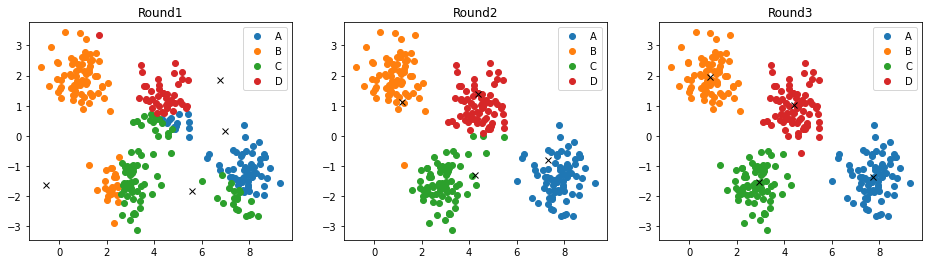

In [6]:
plt.figure(figsize=(16, 4))
for i in range(1, 4):
    
    plt.subplot(1, 3, i)
    cluster_res=cdata.groupby(result['cluster'][i-1])
    for name, group in cluster_res:
        plt.plot(group["x"], group["y"], marker="o", linestyle="", label=name)
    plt.legend(['A', 'B', 'C', 'D'])
    plt.plot(result['x_initial'][i-1], result['y_initial'][i-1], 'kx')
    plt.title('Round%d' % i)

plt.show()